# EDA

In [1]:
import pandas as pd

# Read the cleaned CSV file
df_apps = pd.read_csv(r"C:\Users\USER\OneDrive - Universidad Autonoma de Occidente\1. Ing. IAED\Semestre V\ETL\project_playstore_apps\data\Google-Playstore-Dataset-Clean.csv")

# Show the first rows of the DataFrame
print(df_apps.head())


                App Name      Category Installs  Size Minimum Android  \
0                Gakondo     Adventure      10+   10M      7.1 and up   
1    Ampere Battery Info         Tools   5,000+  2.9M      5.0 and up   
2                 Vibook  Productivity      50+  3.7M    4.0.3 and up   
3                 IMOCCI        Social      50+   46M      6.0 and up   
4  The Everyday Calendar     Lifestyle     500+   16M      5.0 and up   

       Released  Last Updated Content Rating  Rating  Minimum Installs  \
0  Feb 26, 2020  Feb 26, 2020       Everyone     0.0                10   
1  May 21, 2020  May 06, 2021       Everyone     4.4               100   
2   Aug 9, 2019  Aug 19, 2019       Everyone     0.0                50   
3  Dec 24, 2018  Dec 20, 2019           Teen     0.0                50   
4  Jun 21, 2019  Jun 21, 2019       Everyone     2.0               500   

   Maximum Installs  
0                15  
1              7662  
2                58  
3                89  
4     

In [2]:
# Get the number of rows and columns of the DataFrame
num_rows, num_columns = df_apps.shape

print("The DataFrame has {} and {} columns.".format(num_rows, num_columns))

The DataFrame has 1057521 and 11 columns.


In [3]:
print("Dataset information",df_apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057521 entries, 0 to 1057520
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1057518 non-null  object 
 1   Category          1057521 non-null  object 
 2   Installs          1057521 non-null  object 
 3   Size              1057521 non-null  object 
 4   Minimum Android   1057521 non-null  object 
 5   Released          1057521 non-null  object 
 6   Last Updated      1057521 non-null  object 
 7   Content Rating    1057521 non-null  object 
 8   Rating            1057521 non-null  float64
 9   Minimum Installs  1057521 non-null  int64  
 10  Maximum Installs  1057521 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 88.8+ MB
Dataset information None


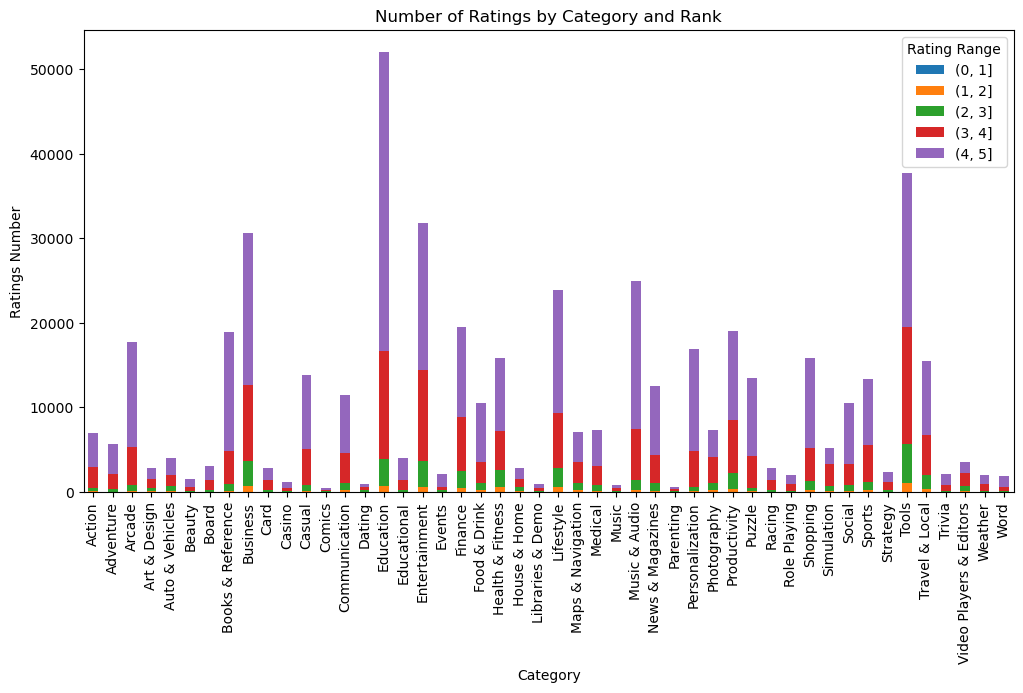

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Define ranges to group ratings
ranges = [0, 1, 2, 3, 4, 5]

# Create the range of each rating
rating_range = pd.cut(df_apps['Rating'], bins=ranges)

# Group data by category and rating range, and count the number of ratings in each group
counting_ratings_category = df_apps.groupby([df_apps['Category'], rating_range]).size().unstack(fill_value=0)

# Create the stacked bar chart
counting_ratings_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Ratings by Category and Rank')
plt.xlabel('Category')
plt.ylabel('Ratings Number')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Rating Range')
plt.show()

* The category with the highest number of qualifications is Education.
* The categories with fewer ratings are comics and parenting.
* The categories with the highest proportion of applications with a rating of 4 to 5 stars are Education, Business, Tools and Entertainment.

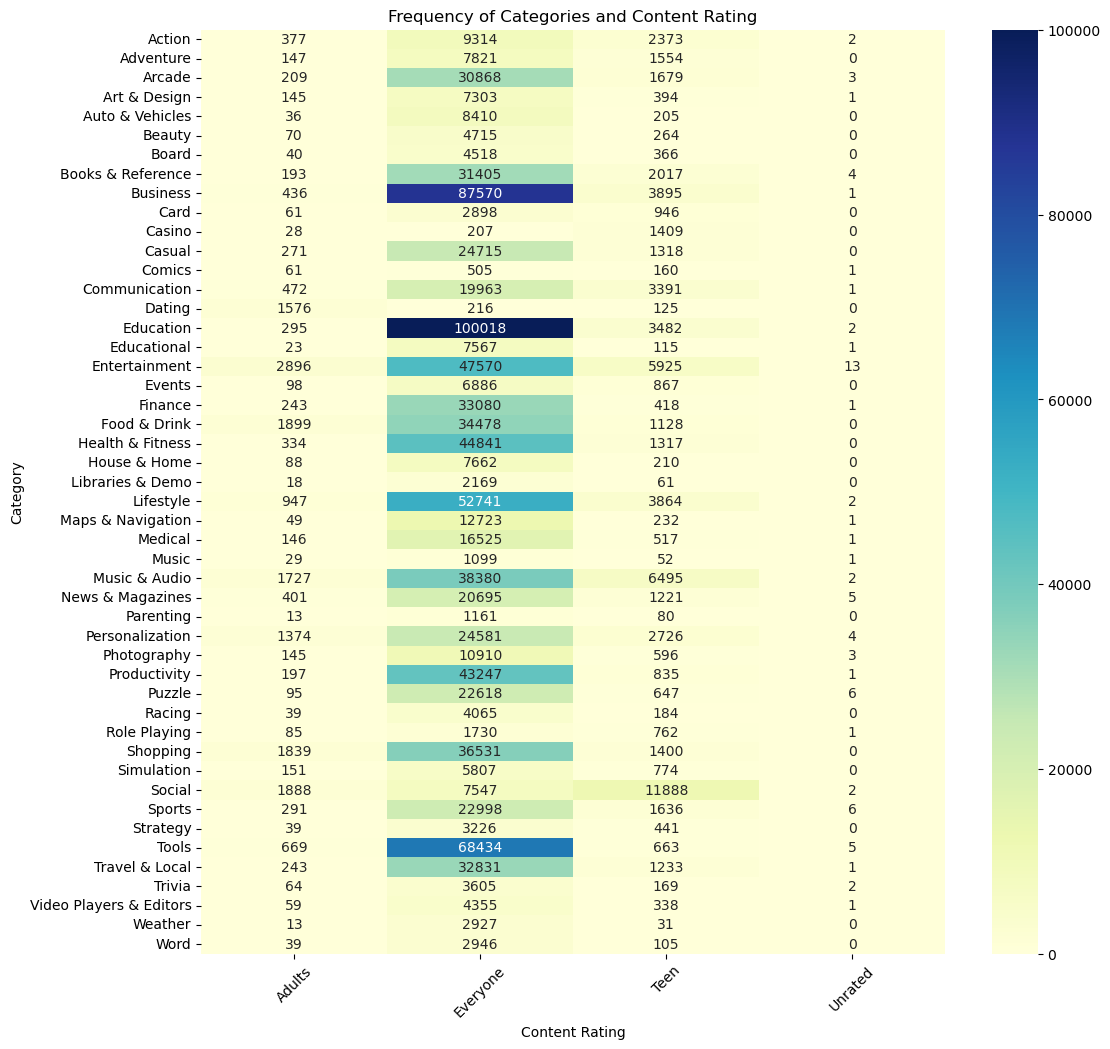

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the frequency table of category and content
frequency_table = df_apps.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)

# Create the heat map
plt.figure(figsize=(12, 12))
sns.heatmap(frequency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Categories and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

* Everyone has more apps in the categories of Education and Business.
* Teens have more apps in Social and Music and Audio.
* Adults have more apps in Entertainment.

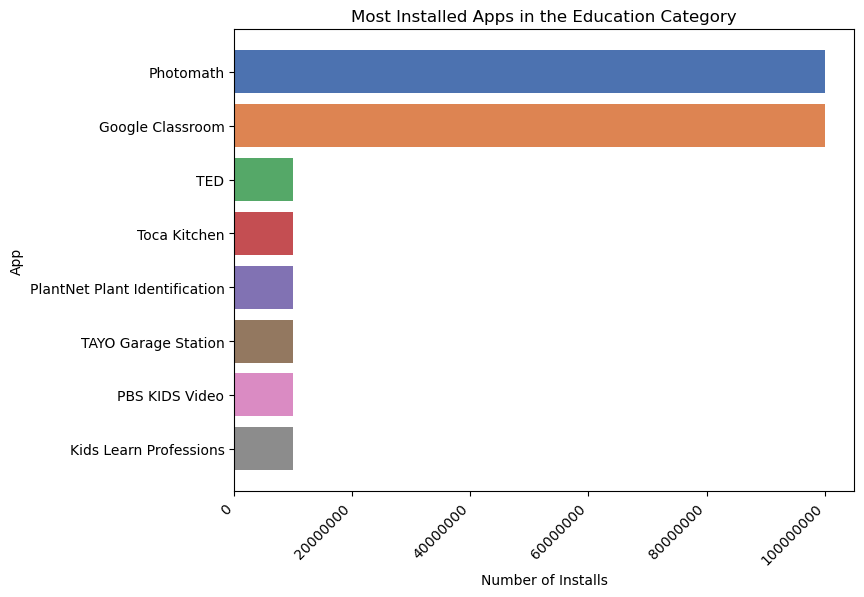

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar los caracteres "+" y "," de los números de instalación
df_modified = df_apps.assign(Installs=lambda x: x['Installs'].str.replace('\+', '', regex=True).str.replace(',', '', regex=True))

# Convert facility values to numeric type
df_modified['Installs'] = pd.to_numeric(df_modified['Installs'], errors='coerce')

# Filter apps from category "Education"
df_educ = df_modified[df_modified['Category'] == 'Education']

# Sort applications by number of installations in descending order
educ_sorted = df_educ.sort_values(by='Installs', ascending=False)
top_educ = educ_sorted.head(8)

palette = sns.color_palette('deep', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_educ['App Name'], top_educ['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Education Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

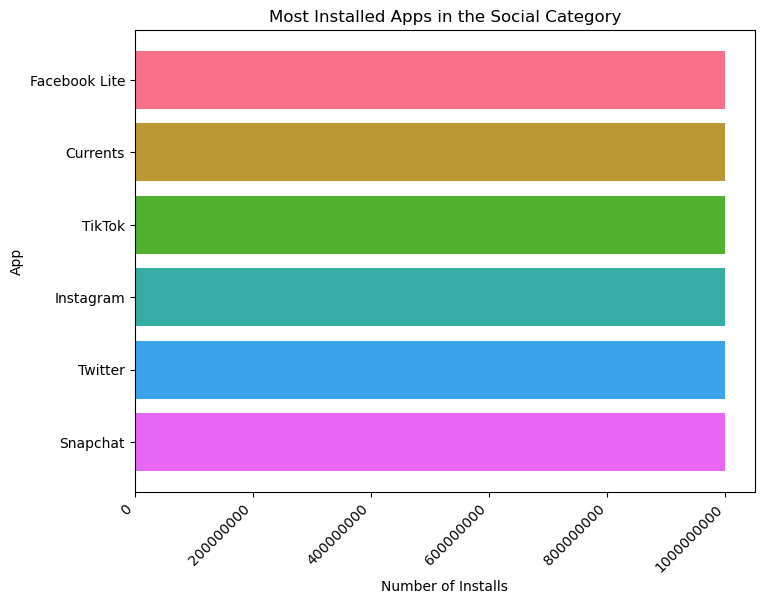

In [7]:
# Filter apps from category "Social"
df_social = df_modified[df_modified['Category'] == 'Social']

# Sort applications by number of installations in descending order
social_sorted = df_social.sort_values(by='Installs', ascending=False)
top_social = social_sorted.head(6)

palette = sns.color_palette('husl', 6)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_social['App Name'], top_social['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Social Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

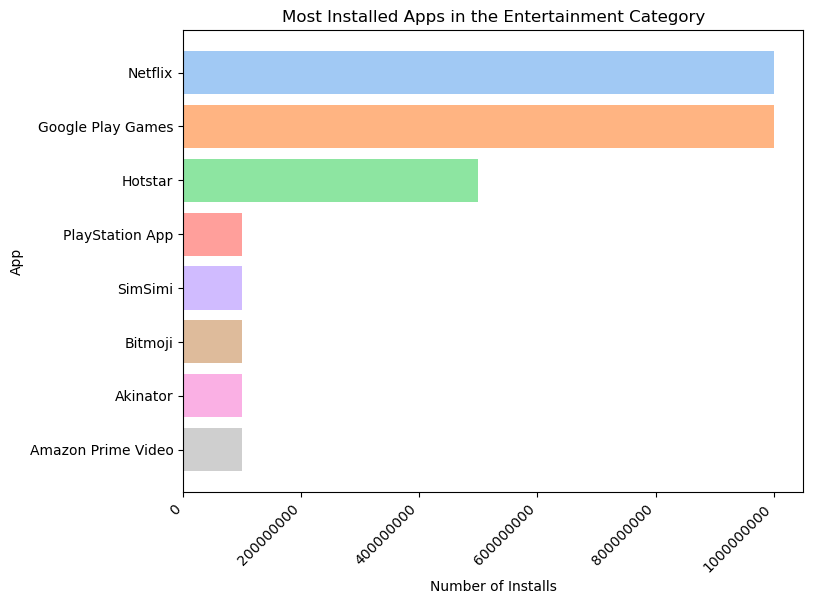

In [8]:
# Filter apps from category "Entertainment"
df_entt = df_modified[df_modified['Category'] == 'Entertainment']

# Sort applications by number of installations in descending order
entt_sorted = df_entt.sort_values(by='Installs', ascending=False)
top_entt = entt_sorted.head(8)

palette = sns.color_palette('pastel', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_entt['App Name'], top_entt['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Entertainment Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

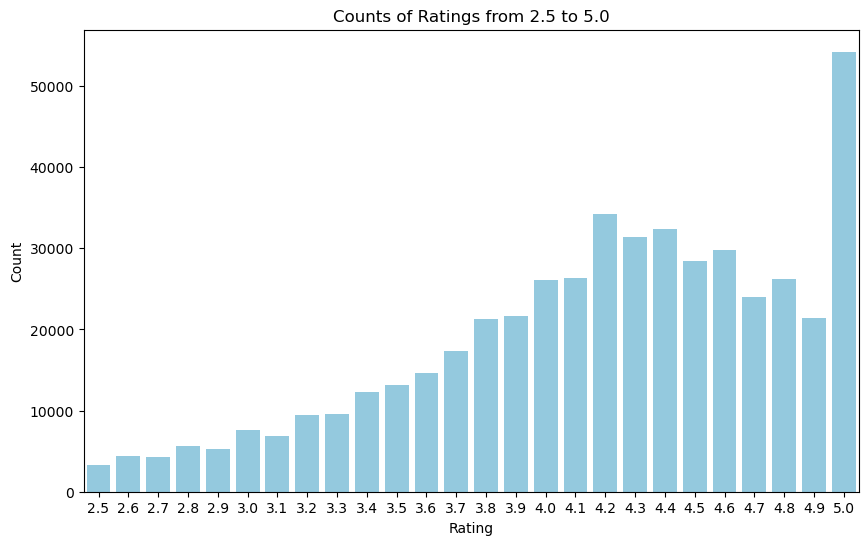

In [9]:
# Here we find the count of rating for each possible mean rating
# Get the counts of values in the 'Rating' column
rating_most = df_apps['Rating'].value_counts()

# Filter the 'Rating' values between 2.5 and 5.0
rating_most_filtered = rating_most[(rating_most.index >= 2.5) & (rating_most.index <= 5.0)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_most_filtered.index, y=rating_most_filtered.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Ratings from 2.5 to 5.0')
plt.show()



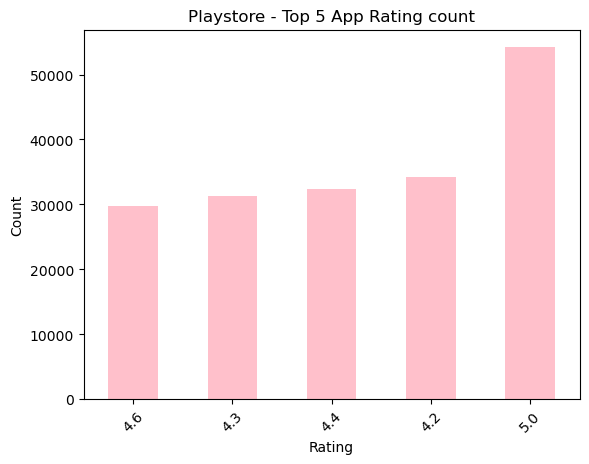

In [10]:
#We look at the top five value counts  for rating
df_filtered = df_apps[df_apps["Rating"] != 0.0]
df_filtered["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar(color='pink')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)

plt.show()

In [11]:
#Here I try to sort app with rating 5 corresponding to installs
df5 = df_apps.sort_values(by=['Installs'], ascending=False)
df5

,App Name,Category,Installs,Size,Minimum Android,Released,Last Updated,Content Rating,Rating,Minimum Installs,Maximum Installs
938112,Mi Music,Music & Audio,"500,000,000+",43M,6.0 and up,"May 26, 2019","Jun 11, 2021",Everyone,4.1,100,377
550995,Huawei Backup,Tools,"500,000,000+",8.9M,5.0 and up,"Apr 13, 2016","Feb 10, 2020",Everyone,4.2,100,377
715452,Microsoft SwiftKey Keyboard,Productivity,"500,000,000+",47M,5.0 and up,"Sep 22, 2010","Jun 10, 2021",Everyone,4.3,100,377
878542,Hill Climb Racing,Racing,"500,000,000+",59M,4.4 and up,"Sep 22, 2012","Jun 11, 2021",Everyone,4.2,100,377
897078,ZOOM Cloud Meetings,Business,"500,000,000+",125M,5.0 and up,"Jan 24, 2013","Jun 08, 2021",Everyone,3.9,100,377
...,...,...,...,...,...,...,...,...,...,...,...
705975,Baggageless Travel,Business,0+,9.9M,5.0 and up,"Jan 26, 2021","Feb 03, 2021",Everyone,0.0,0,0
504419,SESSION ATHLETIC,Health & Fitness,0+,21M,5.0 and up,"Jun 3, 2021","Jun 15, 2021",Everyone,0.0,0,0
1031235,Lima ATM Finder,Maps & Navigation,0+,3.3M,4.1 and up,"Feb 16, 2020","Feb 17, 2020",Everyone,0.0,0,0
155796,OneWear,Lifestyle,0+,11M,6.0 and up,"Nov 15, 2020","Nov 15, 2020",Everyone,0.0,0,0


In [44]:
#Value count of each category for the apps with rating 10
df6 = df5.Category.value_counts(ascending=False)
print(df6)

Category
Education                  103797
Business                    91902
Tools                       69771
Lifestyle                   57554
Entertainment               56404
Music & Audio               46604
Health & Fitness            46492
Productivity                44280
Shopping                    39770
Food & Drink                37505
Travel & Local              34308
Finance                     33742
Books & Reference           33619
Arcade                      32759
Personalization             28685
Casual                      26304
Sports                      24931
Communication               23827
Puzzle                      23366
News & Magazines            22322
Social                      21325
Medical                     17189
Maps & Navigation           13005
Action                      12066
Photography                 11654
Adventure                    9522
Auto & Vehicles              8651
House & Home                 7960
Events                       7851
Art &

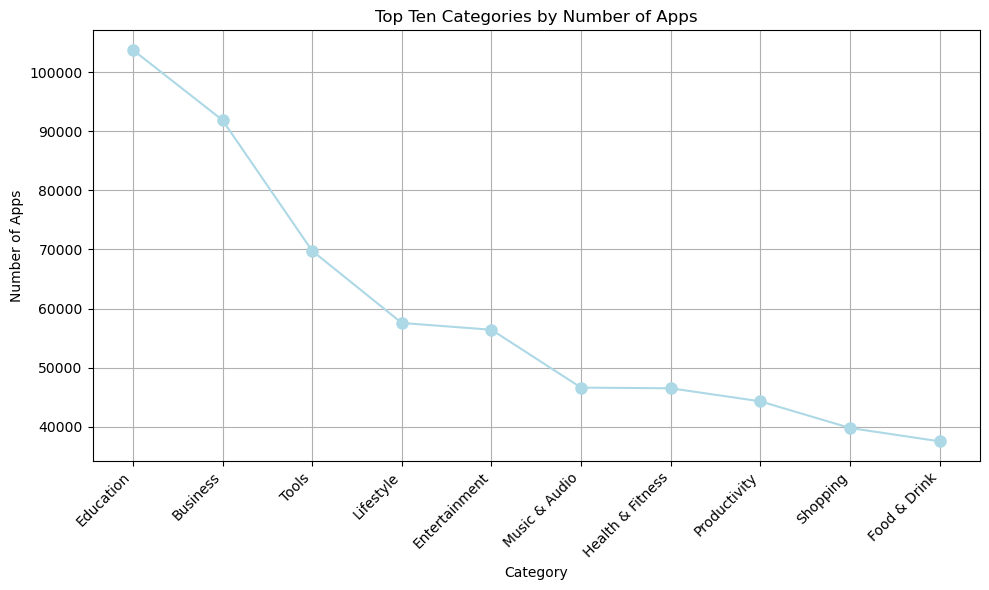

In [45]:
# Get the value counts of each category
category_counts = df_apps['Category'].value_counts()

# Select the top ten categories
top_categories = category_counts.nlargest(10)
top_categories1 = top_categories.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(top_categories1.index, top_categories1, marker='o', markersize=8, color='lightblue')
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Top Ten Categories by Number of Apps")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()